In [16]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM

## Load Data
dfa = pd.read_csv("data.csv")
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

ImportError: cannot import name 'GMM' from 'sklearn.mixture' (/Users/austinwilson/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/__init__.py)

In [2]:

## Clustering with KMeans
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(dfa_std)
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
kmeans4 = KMeans(n_clusters=4, random_state=42).fit(dfa_std)


labels2 = kmeans2.labels_
labels3 = kmeans3.labels_
labels4 = kmeans4.labels_



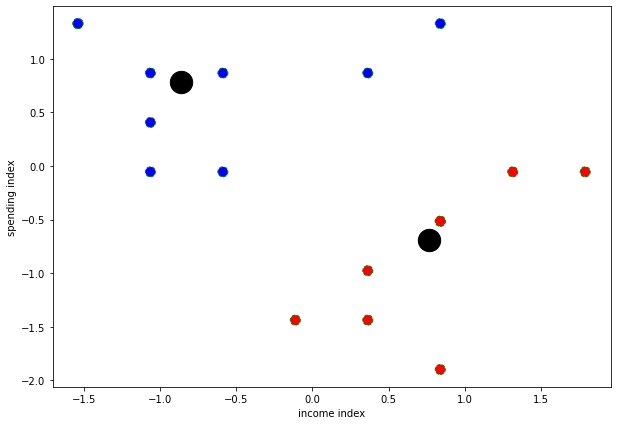

In [3]:
new_dfa = pd.DataFrame(data = dfa_std, columns = ['spending index','income index'])
new_dfa['label_kmeans'] = labels2
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["income index"][new_dfa["label_kmeans"] == 0], new_dfa["spending index"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["income index"][new_dfa["label_kmeans"] == 1], new_dfa["spending index"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
# plt.scatter(new_dfa["income index"][new_dfa["label_kmeans"] == 2], new_dfa["spending index"][new_dfa["label_kmeans"] == 2], 
#             color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('income index')
ax.set_ylabel('spending index')
plt.show()

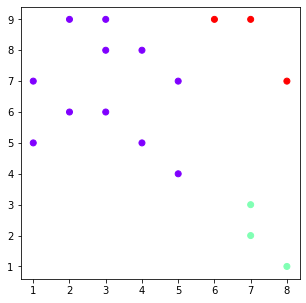

In [7]:
# heirarchical clustering 
# data
a, b, c, d, e = (3,9), (3,8), (4,8), (2,9), (5,7)

f,g,h,i,j,k=(2,6), (3,6), (4,5), (1,7), (1,5), (5,4)
l,m,n,o,p,q=(6,9),(7,9),(8,7),(7,3),(7,2),(8,1)
data = np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q])

#data = np.array([(2,6),(3,7),(5,8),(5,5),(6,6),(2,2),(5,2),(7,3),(8,4),(10,6),(12,8)])  

# average link
avg_link_cluster = AgglomerativeClustering(n_clusters=3, linkage='average').fit(data)
plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], c=avg_link_cluster.labels_, cmap='rainbow')
plt.show()

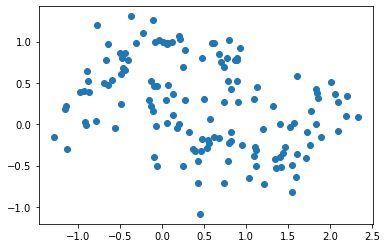

In [12]:
# GMM
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(138, noise=.2, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

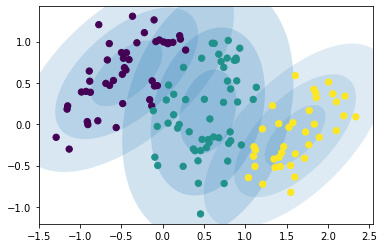

In [19]:
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=0)

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
plot_gmm(gmm, Xmoon)

In [22]:
from pycaret.datasets import get_data
dataset = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [23]:

data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


In [35]:
!pip install pycaret

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached pycaret-2.3.5-py3-none-any.whl (288 kB)
  Using cached mlflow-1.22.0-py3-none-any.whl (15.5 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit_learn-0.23.2-cp39-cp39-macosx_11_0_x86_64.whl
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached gensim-3.8.3-cp39-cp39-macosx_11_0_x86_64.whl
  Using cached matplotlib-3.5.0-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached pyod-0.9.5-py3-none-any.whl
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached textblob-0.1

In [ ]:
exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

In [32]:
kmeans = create_model('kmeans')

NameError: name 'create_model' is not defined